# Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.rc('font', size = 14)

from MD import ELEMENTS

# Data

In [2]:
# ELEMENTS = ['He', 'H2', 'Ne', 'N2', 'O2']
TEMPS = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

In [3]:
data = {}
for e in ELEMENTS:
    data[e] = {}
    for t in TEMPS:
        data[e][t] = pd.read_csv(f'output/{e}/{e}_T{t}.csv').rename(columns={'Unnamed: 0': 'time'})

# Mean Squared Displacement
$$
MSD = \langle |r(t) - r(0)|^2 \rangle
$$

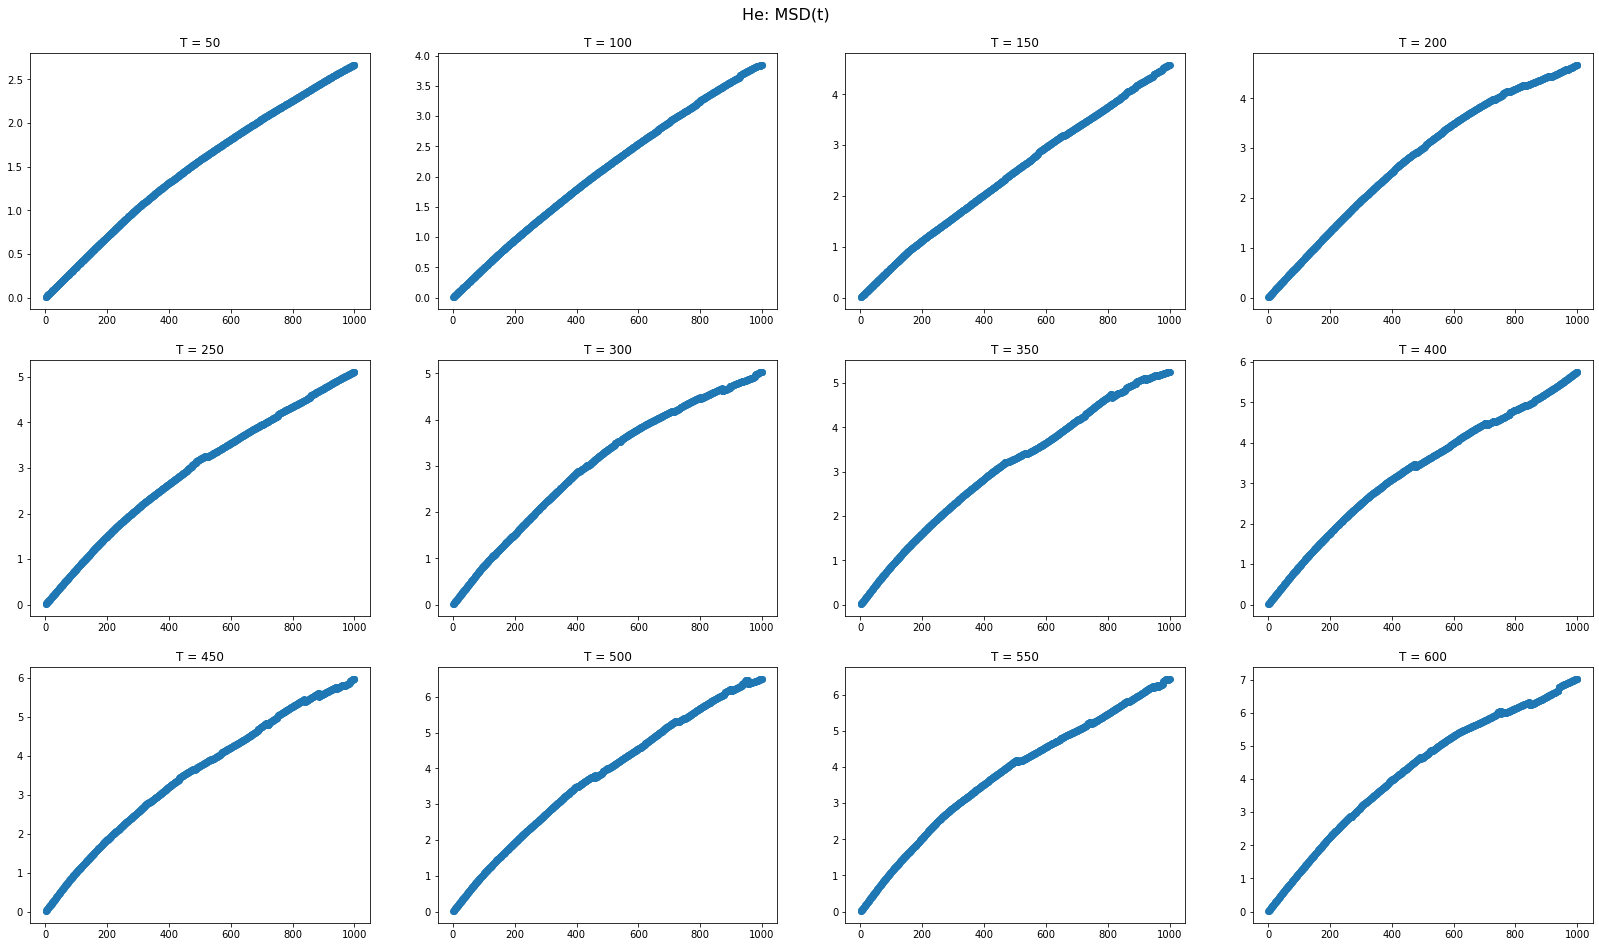

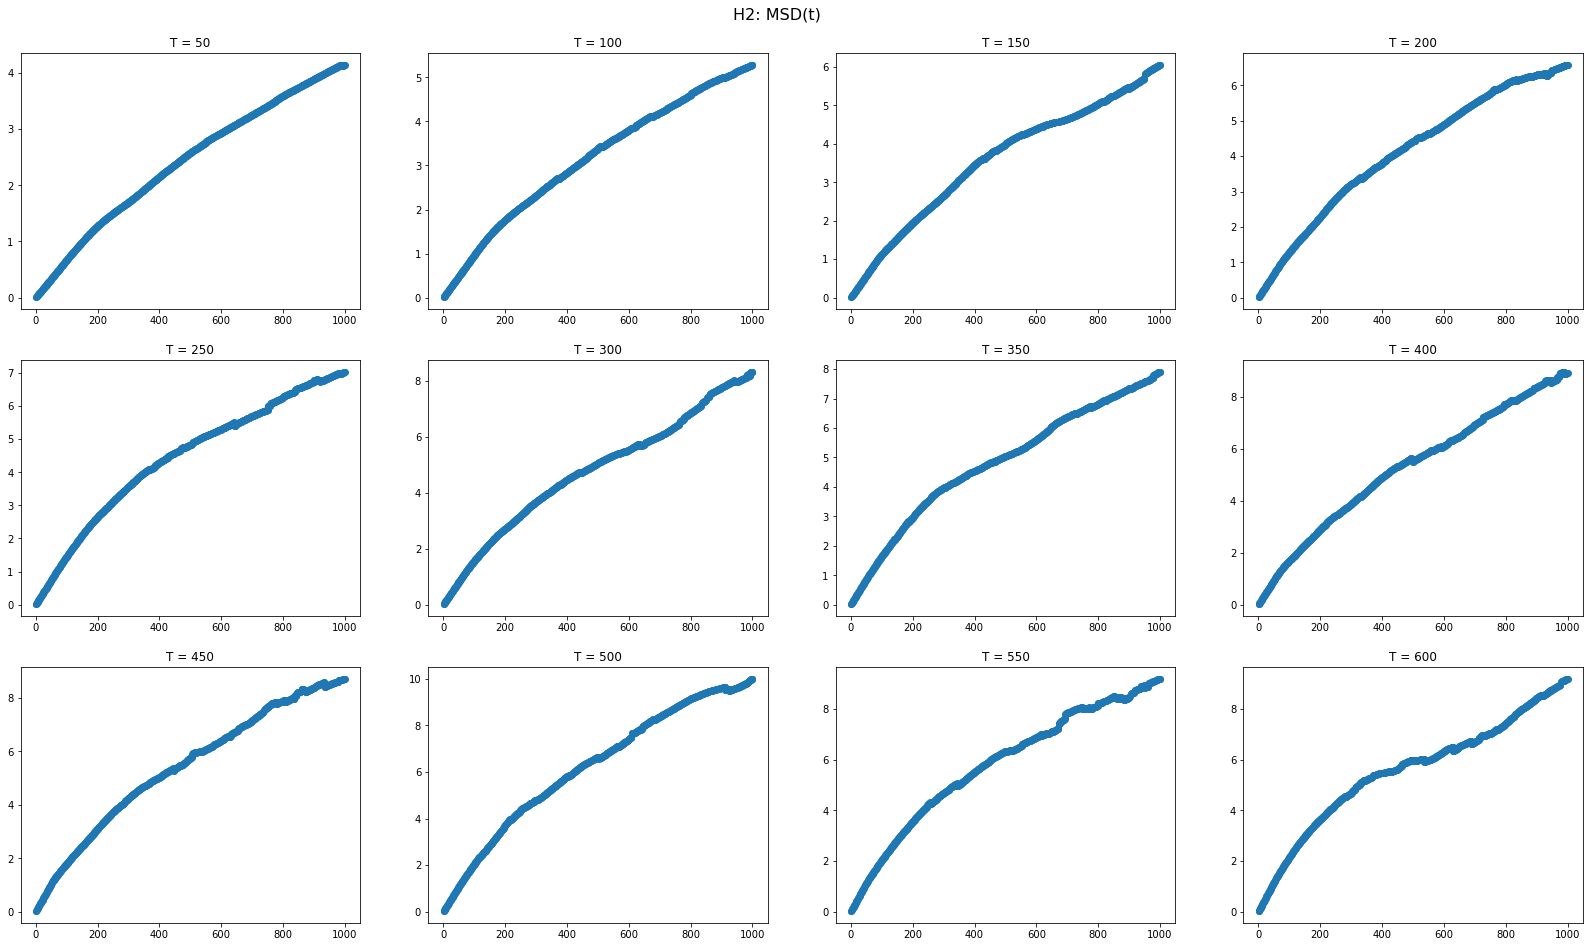

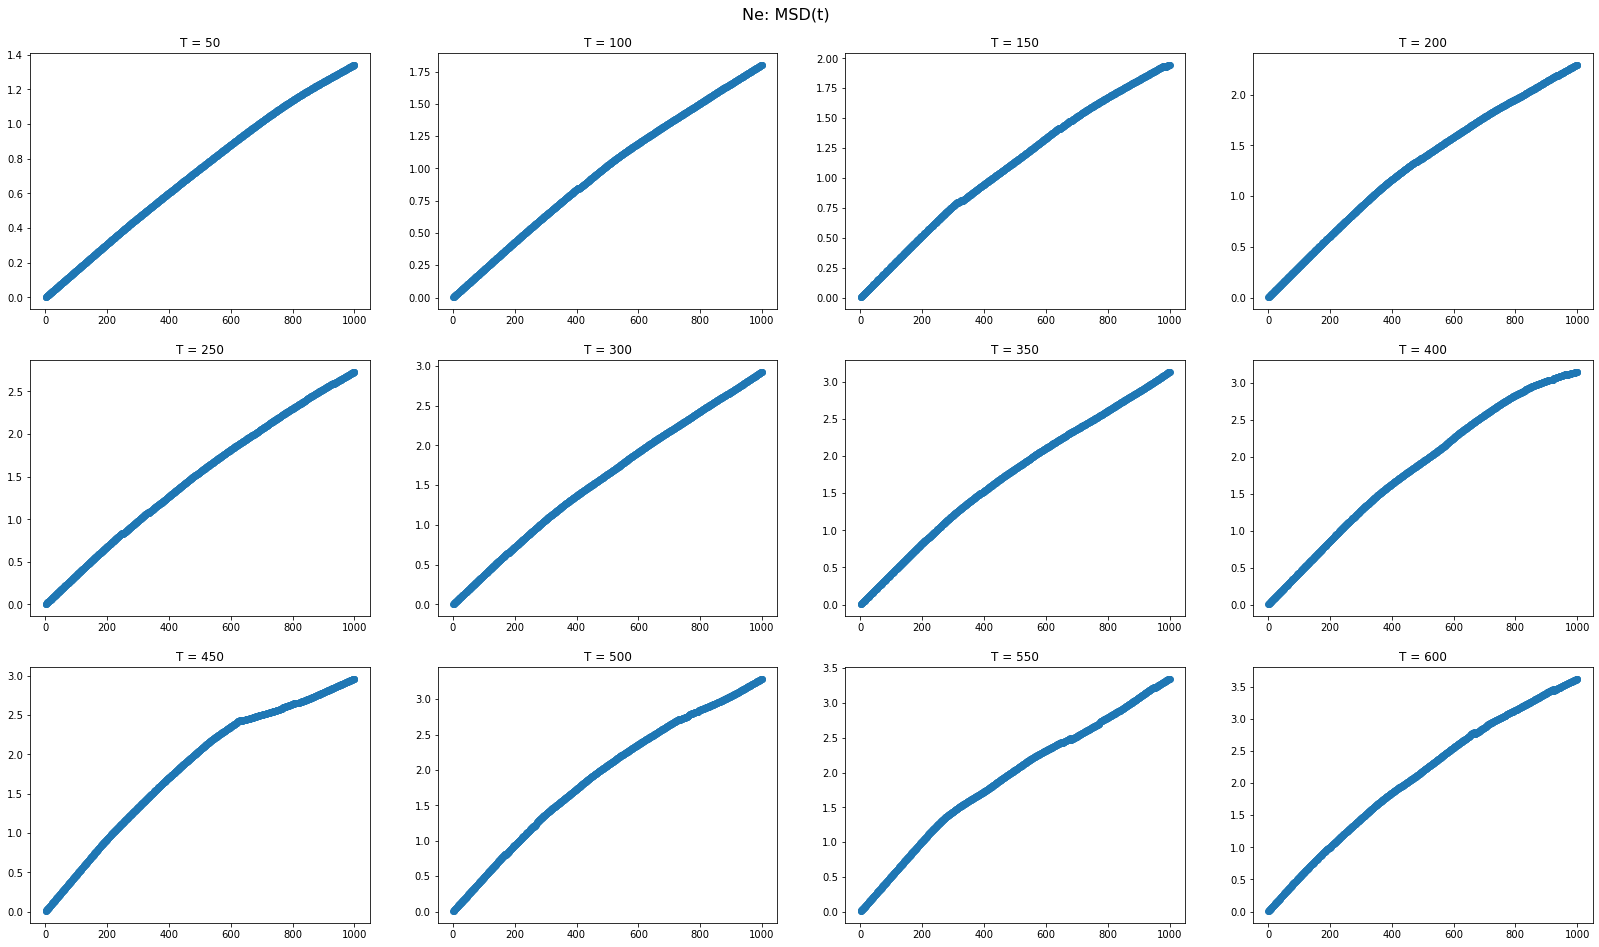

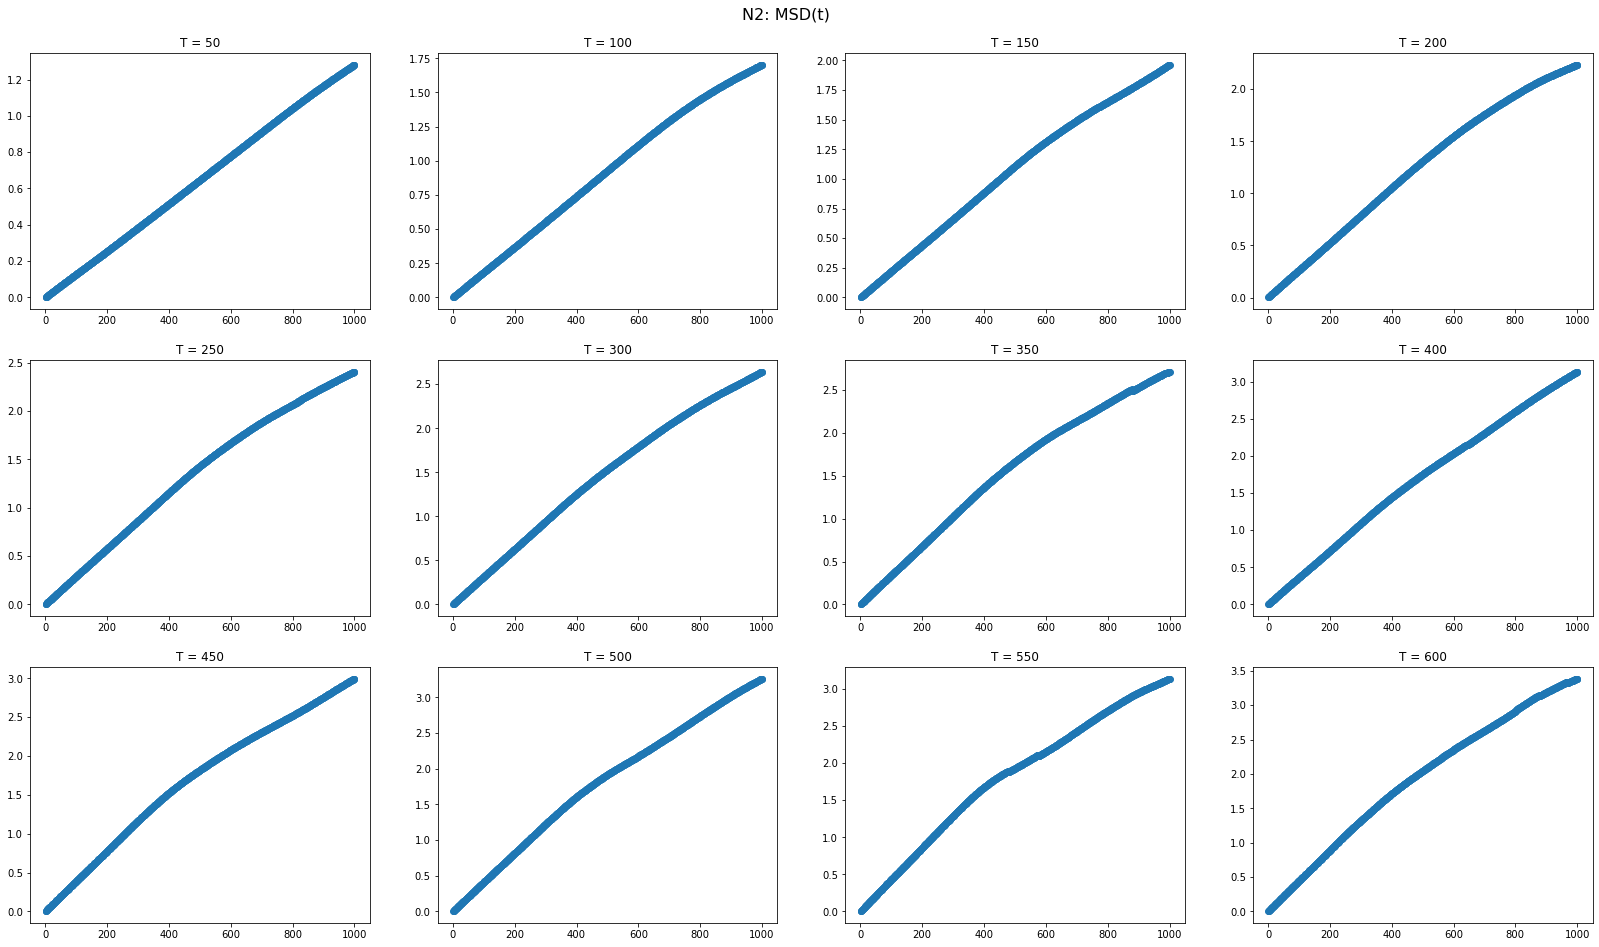

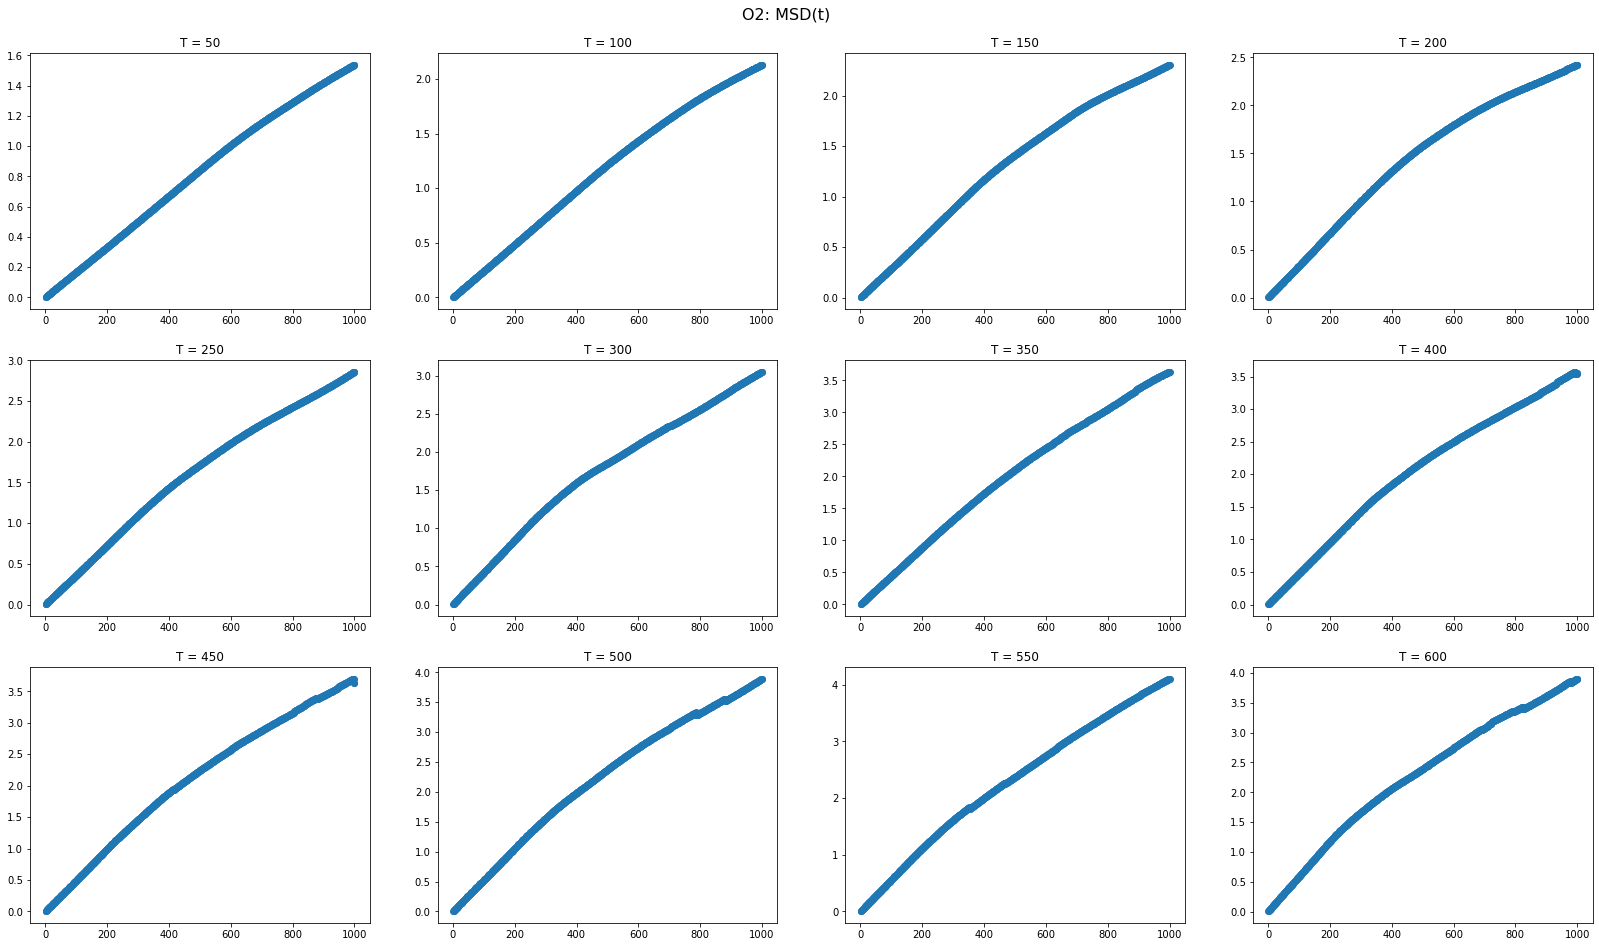

In [5]:
el = 'Ne'
box_size = ELEMENTS[el]['sig'] * 7.5
MSD = {}
for el in ELEMENTS:
    MSD[el] = {}
    box_size = ELEMENTS[el]['sig'] * 7.5
    for T in TEMPS:
        MSD[el][T] = pd.DataFrame()
        df = data[el][T]
        for i in set(df['time']):
            if i == 0:
                continue
            # rt = np.array(df.loc[df['time'] == i-1, ['x', 'y']])
            rt = np.array(df.loc[df['time'] == 0, ['x', 'y']])
            rtdt = np.array(df.loc[df['time'] == i, ['x', 'y']])
            dp = rtdt - rt
            dp = dp[dp[:, 0] <  box_size]
            dp = dp[dp[:, 0] > -box_size]
            dp = dp[dp[:, 1] <  box_size]
            dp = dp[dp[:, 1] > -box_size]
            dr = np.sqrt(dp[:, 0]**2 + dp[:, 1]**2)
            MSD[el][T].loc[i, 'MSD'] = dr.mean()

    fig, axs = plt.subplots(3, 4, figsize = (28, 16))
    fig.suptitle(f"{el}: MSD(t)", fontsize=16, y = 0.92)
    for i in range(len(TEMPS)):
        row = i // 4
        col = i % 4
        ax = axs[row, col]
        temp = TEMPS[i]
        ax.scatter(MSD[el][temp].index, MSD[el][temp]['MSD'])
        ax.set_title(f"T = {temp}")

# Diffusion
$$
D = \lim_{t\to\infty}{\frac{1}{4t}\langle |r(t) - r(0)|^2 \rangle} = \lim_{t\to\infty}{\frac{1}{4t}MSD(t)}
$$

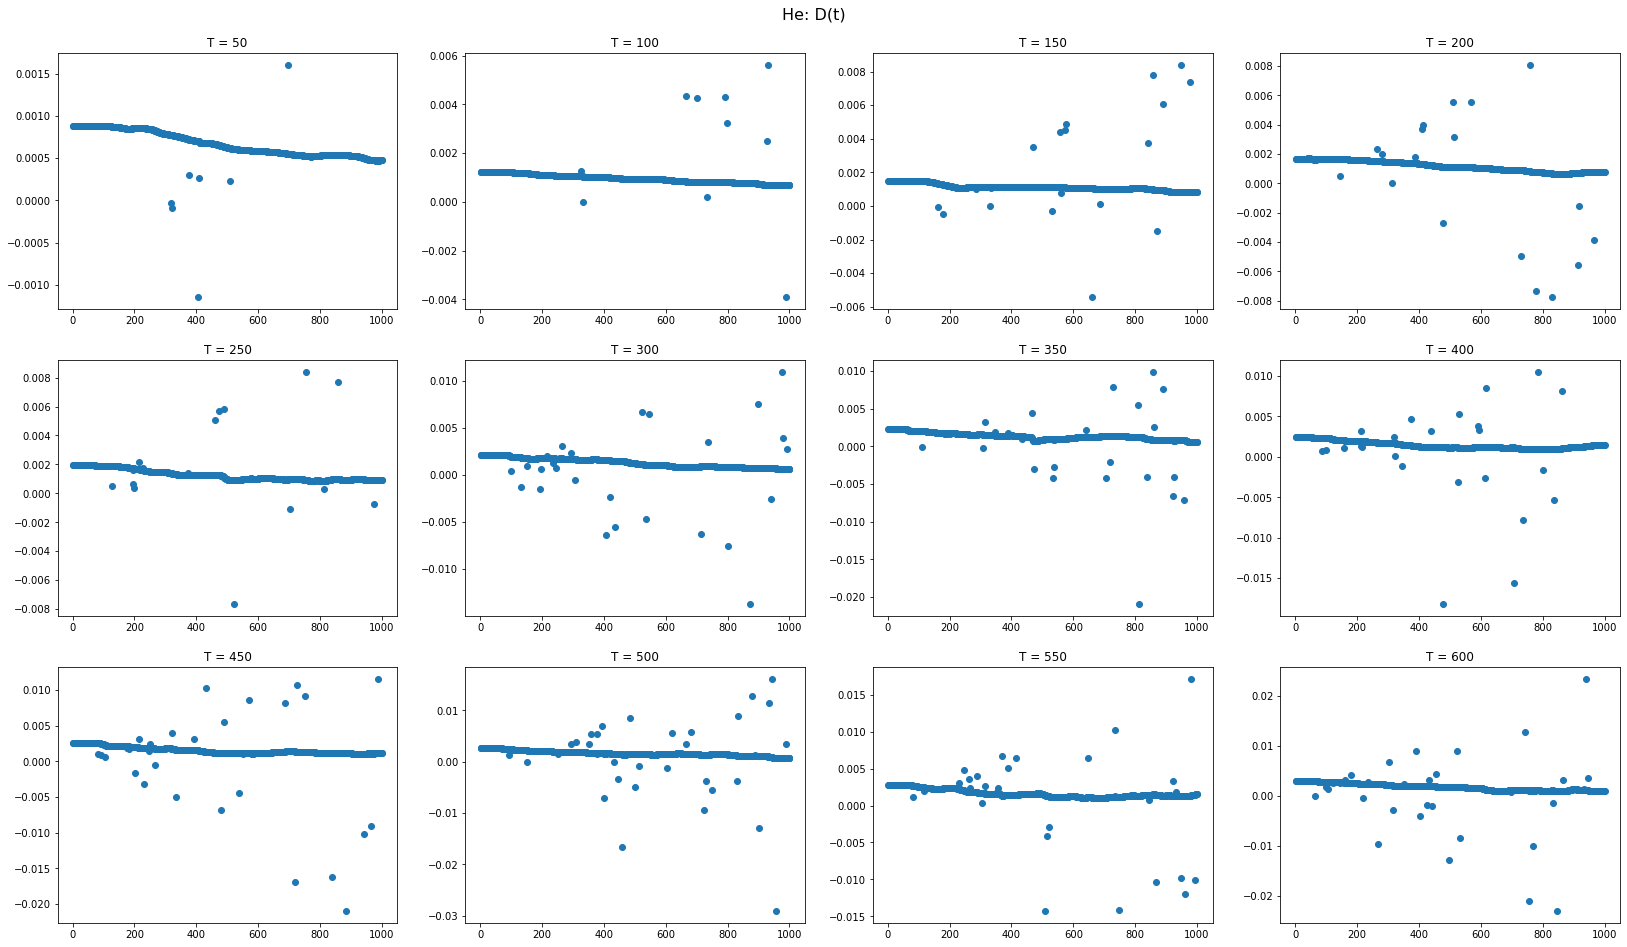

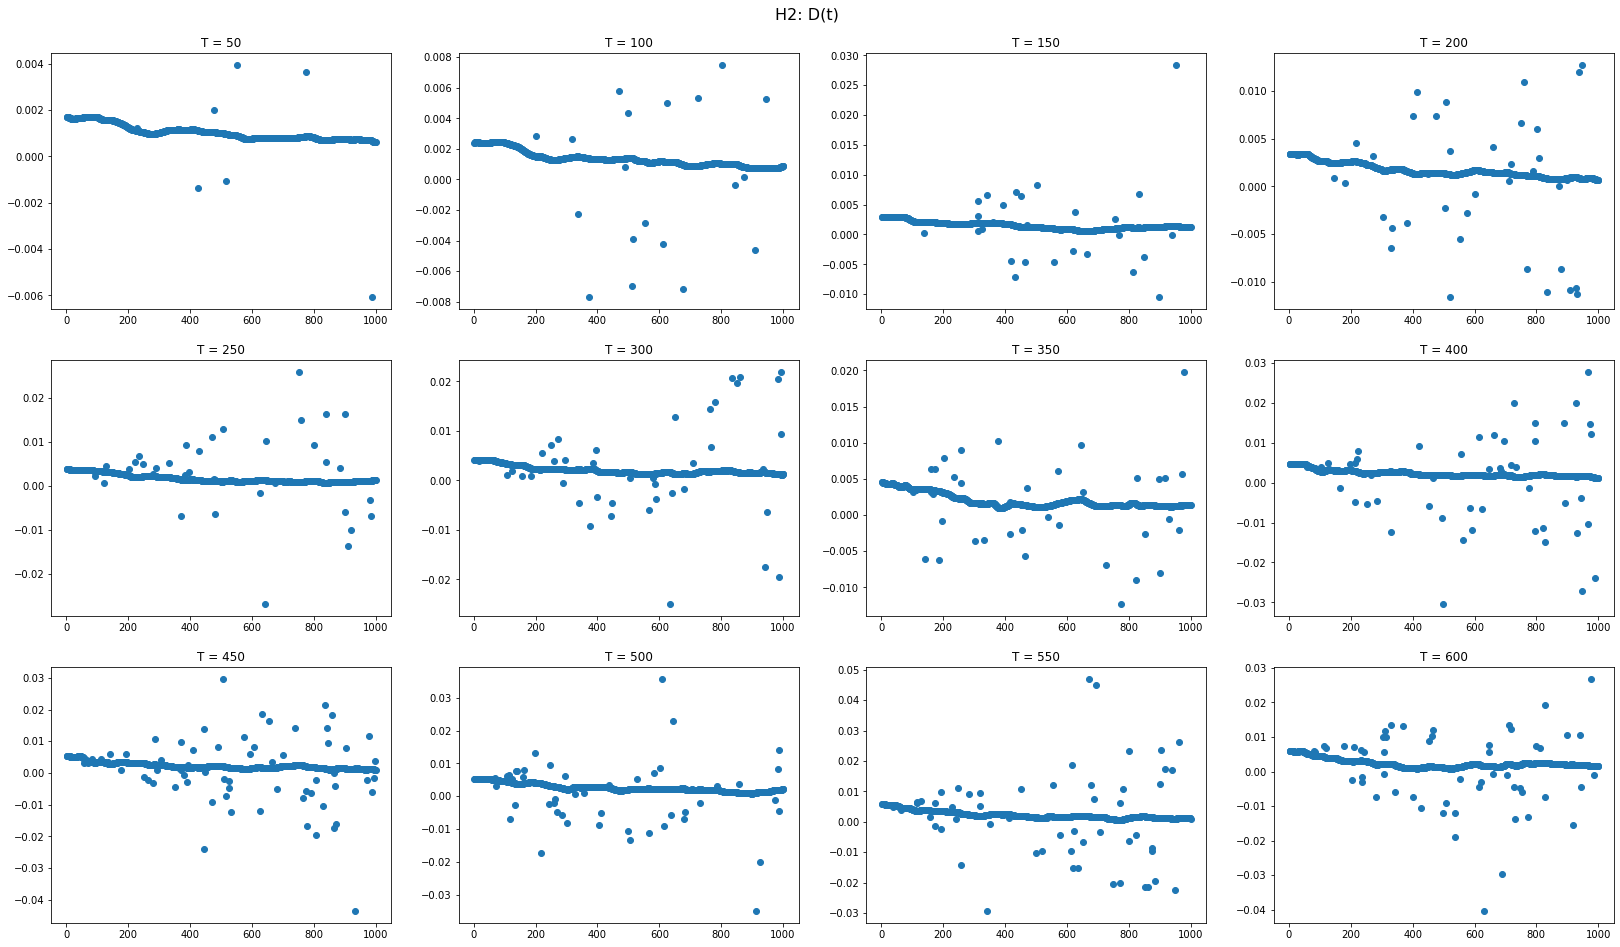

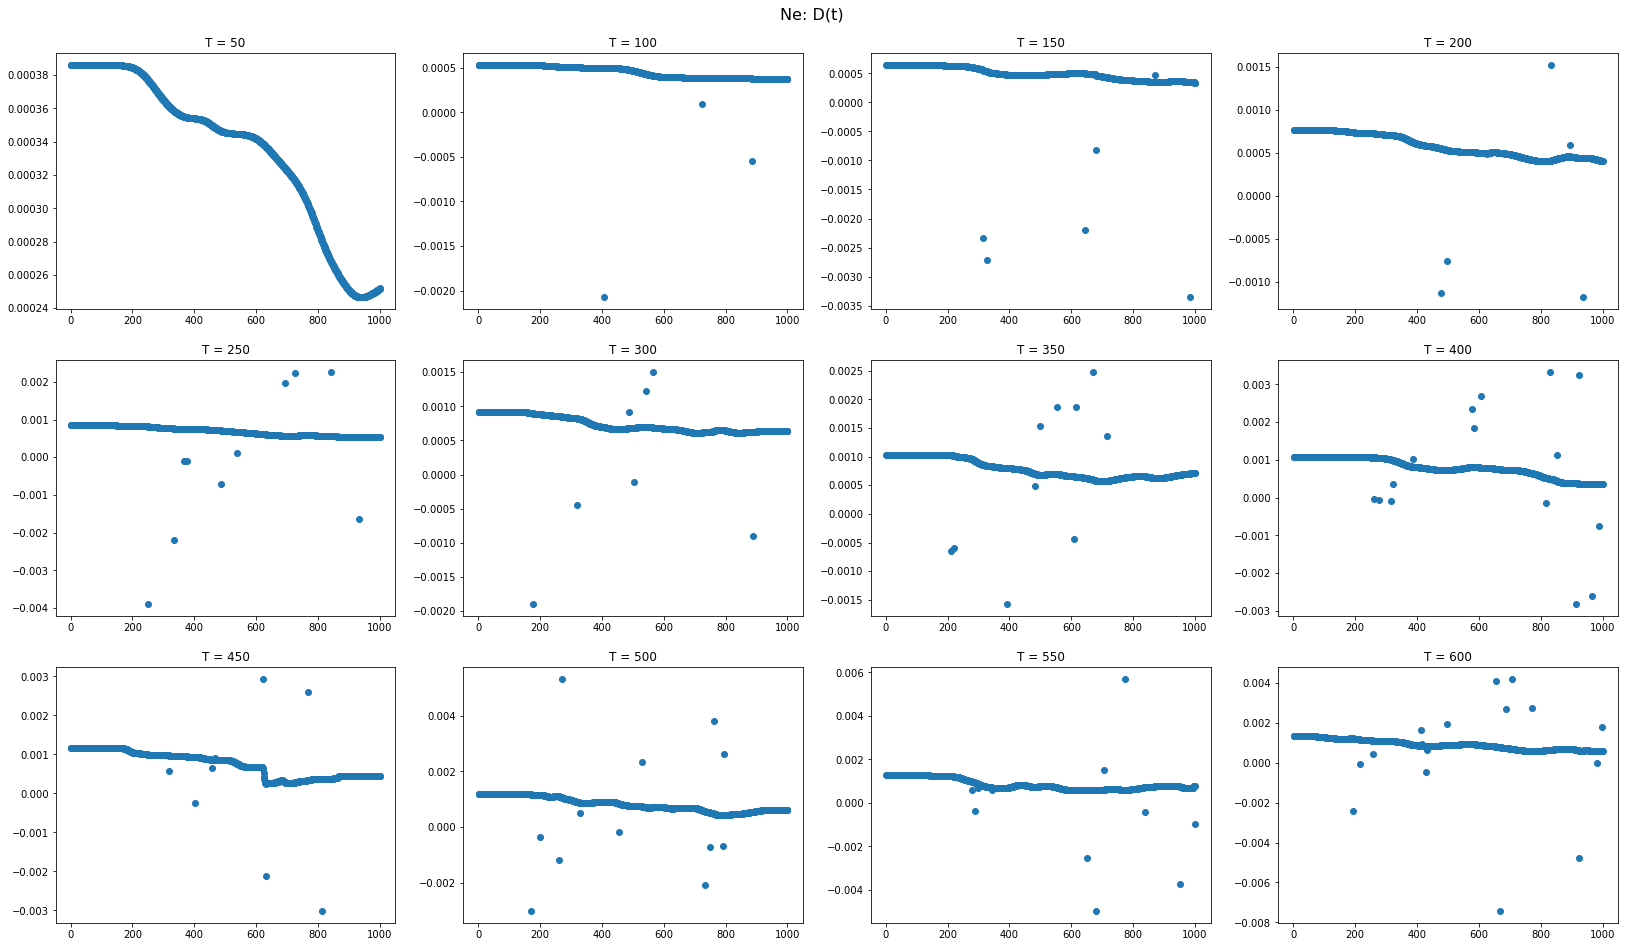

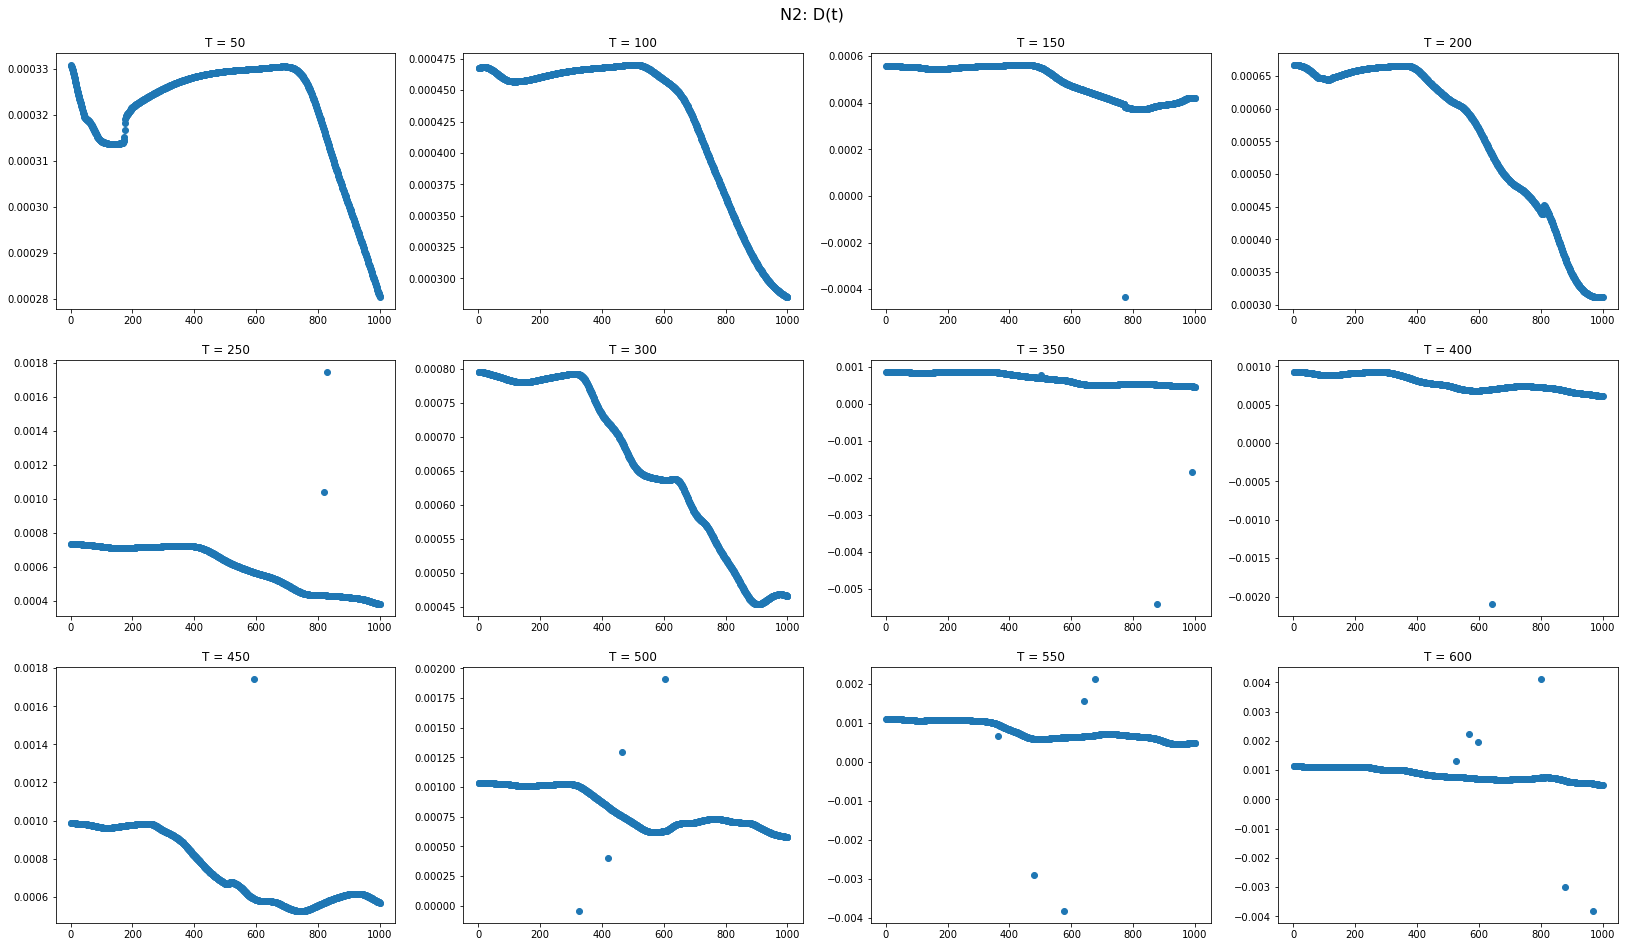

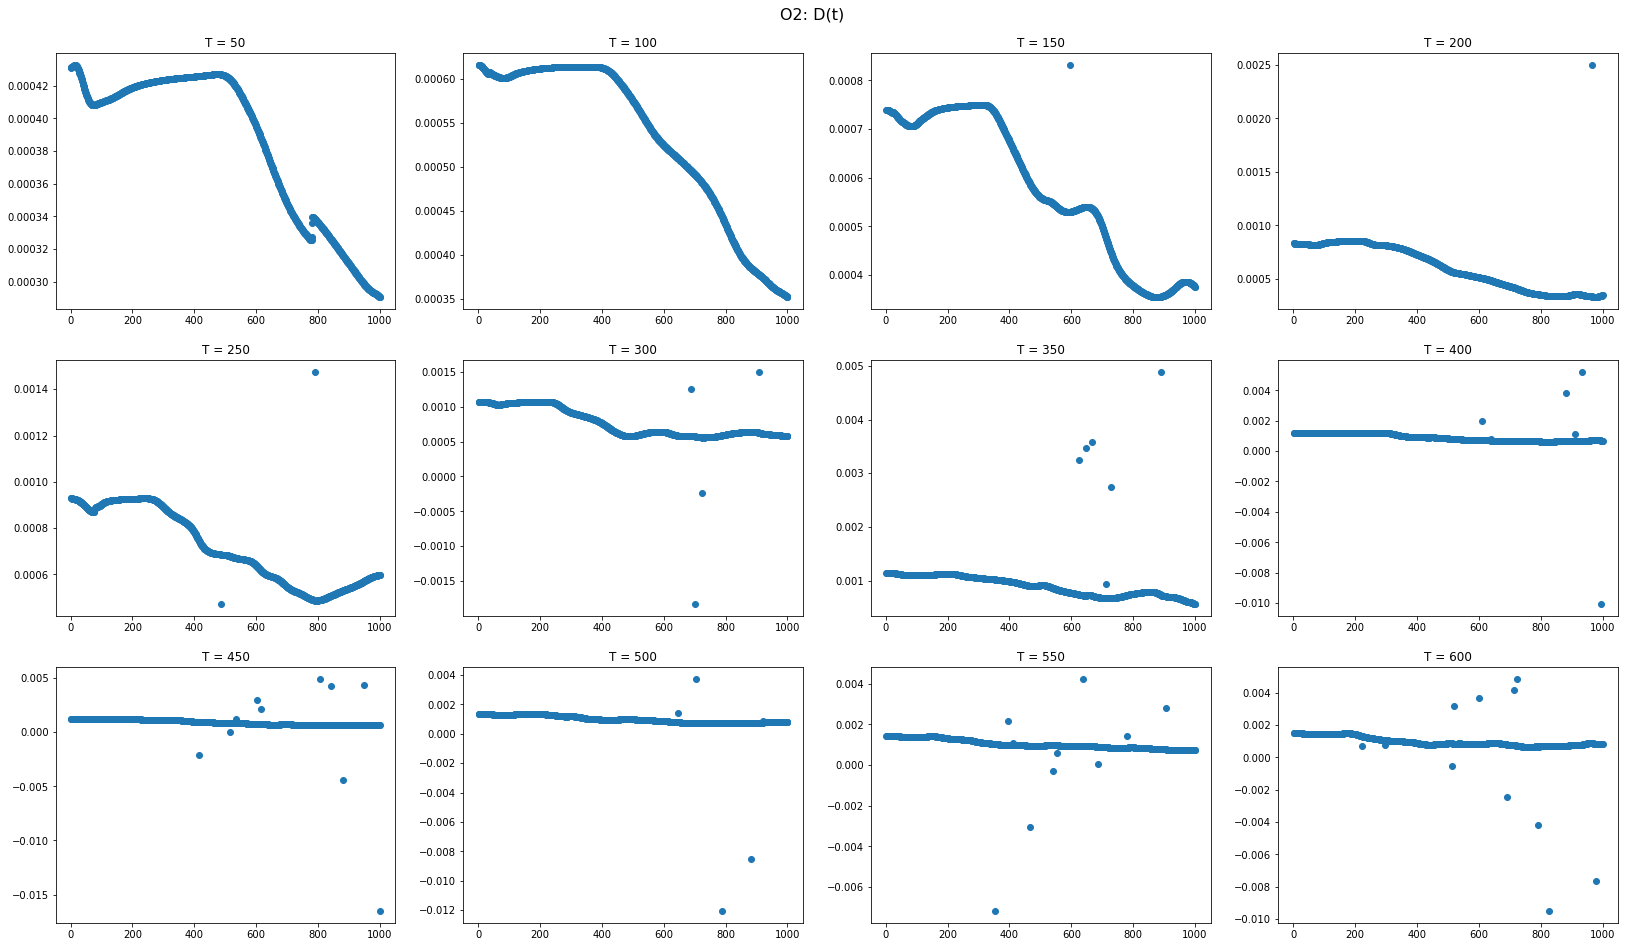

In [24]:
for el in ELEMENTS:
    for temp in TEMPS:
        df1 = MSD[el][temp]
        der = np.diff(df1['MSD']) / np.diff(df1.index)
        MSD[el][temp].loc[2:, 'D'] = 0.25 * der

    fig, axs = plt.subplots(3, 4, figsize = (28, 16))
    fig.suptitle(f"{el}: D(t)", fontsize=16, y = 0.92)
    for i in range(len(TEMPS)):
        row = i // 4
        col = i % 4
        ax = axs[row, col]
        temp = TEMPS[i]
        ax.scatter(MSD[el][temp].index, MSD[el][temp]['D'])
        ax.set_title(f"T = {temp}")